## Sharrey Suhendra

## HW05 Code


You will complete the following notebook, as described in the PDF for Homework 05 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file and the two tree images (PDFs generated using `graphviz` within the code), to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](https://piazza.com/tufts/spring2021/comp135).

### Import required libraries.

In [1]:
import numpy as np
import pandas as pd

import sklearn.tree
import graphviz

## Decision Trees

You should start by computing the two heuristic values for the toy data described in the assignment handout. You should then load the two versions of the abalone data, compute the two heuristic values on features (for the simplified data), and then build decision trees for each set of data.

### 1 Compute both heuristics for toy data.

#### (a) Compute the counting-based heuristic, and order the features by it.

In [2]:
#Let 1 be o, 0 be x
A = np.array([[1,1],[0,0,0,0,1,1]], dtype=object)
B = np.array([[1,1,1,0],[1,0,0,0]])

def countingHeuristic(attr, num_labels):
    total_data = 0 
    majority = 0
    
    for a in attr:
        total_data += len(a)
        
        if num_labels == 2:
            majority += max(sum(a), len(a)-sum(a))
            
        else:
            d = dict() #dictionary is used to store the number of labels in each attribute, decide the majority
            for i in range(num_labels): 
                d[i] = 0
            for label in a:
                d[label] += 1
            majority += max(d[j] for j in d)
    
    return majority, total_data

num_correct_A, total_data_A = countingHeuristic(A, 2)
print("A: "+ str(num_correct_A) + "/" + str(total_data_A))
num_correct_B, total_data_B = countingHeuristic(B, 2)
print("B: "+ str(num_correct_B) + "/" + str(total_data_B))

A: 6/8
B: 6/8


#### (b) Compute the information-theoretic heuristic, and order the features by it.

In [3]:
def entropy(num):
    if num == 0: 
        return 0
    e = (-1) * num * np.log2(num)
    return e

def infoTheory(attr): 
    total_data = 0
    total_trueVal = 0
    total_avg = 0.0
    reminder = 0
    d_total = {}
    
    #assign how many 1 and 0
    for a in attr:
        total_data += len(a) 
        for value in a:
            if value not in d_total: 
                d_total[value] = 1
            else:
                d_total[value] += 1       

    for key in d_total.keys():
        total_avg += entropy(d_total[key] / total_data)
        
    for a in attr:
        poss = len(a) / total_data
        sub_label = {}
        
        for value in a:
            if value not in sub_label: 
                sub_label[value] = 1
            else:
                sub_label[value] += 1
                
        for key in sub_label.keys():
            reminder += poss * entropy(sub_label[key] / len(a))

    return total_avg - reminder
                                       
print("A: " + str(infoTheory(A)))
print("B: " + str(infoTheory(B)))

A: 0.31127812445913283
B: 0.18872187554086706


#### (c) Discussion of results.

If we use counting-based heuristic, we look for the majority from each branch and treat each leaf equally. Looking at feature A and its tree diagram, the left branch that contains only circles convey more information than the right that has a mix of both circles and crosses. However when applying the counting-based heuristic, the useful information of the left gets balanced by the right branch. If we use information-theoretic heuristic, we can find branches that conveys more information. Based on the results, feature A had a higher hueuristic gain value and thus weighs more than B. Looking back at the diagrams, this makes sense because in A's tree, the left branch can help exclude some data while in B's tree, neither branches can.

Overall, though counting-based heuristic is easier to implement, it is not as accurate as information-theoretic heuristic that helps find the most useful information in building a decision tree through the entropy.

### 2 Compute both heuristics for simplified abalone data.

#### (a) Compute the counting-based heuristic, and order the features by it.

In [4]:
sTr_x = np.loadtxt('./data_abalone/small_binary_x_train.csv', skiprows=1, delimiter=',')
sTe_x = np.loadtxt('./data_abalone/small_binary_x_test.csv', skiprows=1, delimiter=',')
sTr_y = np.loadtxt('./data_abalone/3class_y_train.csv', skiprows=1, delimiter =',')
sTe_y = np.loadtxt('./data_abalone/3class_y_test.csv', skiprows=1, delimiter= ',')

import csv
sHeaders = next(csv.reader(open('./data_abalone/small_binary_x_train.csv','rt')))
num_sHeaders = len(sHeaders)

In [5]:
d = dict()
total_d = 0
for i in range(num_sHeaders):
    attr, true, false = [], [], []

    for index, value in enumerate(sTr_x[:,i].transpose()):
        false.append(sTr_y[index]) if value == 0 else true.append(sTr_y[index])
    
    attr.append(true), attr.append(false)
    feature = sHeaders[i] 
    num_c, total_d = countingHeuristic(attr, 3)
    d[feature] = num_c  

sorted_d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))
for key in sorted_d.keys():
    print(key + ": " + str(sorted_d[key]) + "/" + str(total_d))

height_mm: 2316/3176
diam_mm: 2266/3176
length_mm: 2230/3176
is_male: 1864/3176


#### (b) Compute the information-theoretic heuristic, and order the features by it.

In [6]:
d1 = dict()
for i in range(num_sHeaders):
    attr, true, false = [], [], []
    
    for index, value in enumerate(sTr_x[:,i].transpose()):
        false.append(sTr_y[index]) if value == 0 else true.append(sTr_y[index])
            
    attr.append(true), attr.append(false) 
    feature = sHeaders[i] 
    d1[feature] = infoTheory(attr)

sorted_d1 = dict(sorted(d1.items(), key=lambda item: item[1], reverse=True))
for key in sorted_d1.keys():
    print(key + ": " + str(sorted_d1[key]))

height_mm: 0.17302867291002488
diam_mm: 0.1500706886802703
length_mm: 0.13543816377043694
is_male: 0.02451648227175207


### 3 Generate decision trees for full- and restricted-feature data

#### (a) Print accuracy values and generate tree images.

In [7]:
allTr_x = np.loadtxt('./data_abalone/x_train.csv', skiprows=1, delimiter=',')
allTe_x = np.loadtxt('./data_abalone/x_test.csv', skiprows=1, delimiter=',')
allTr_y = np.loadtxt('./data_abalone/y_train.csv', skiprows=1, delimiter =',')
allTe_y = np.loadtxt('./data_abalone/y_test.csv', skiprows=1, delimiter= ',')
allHeaders = next(csv.reader(open('./data_abalone/x_train.csv','rt')))
num_allHeaders = len(allHeaders)

Training Data Accuracy (small): 0.7327
Testing Data Accuracy (small): 0.7220
Tree : ALL DATA


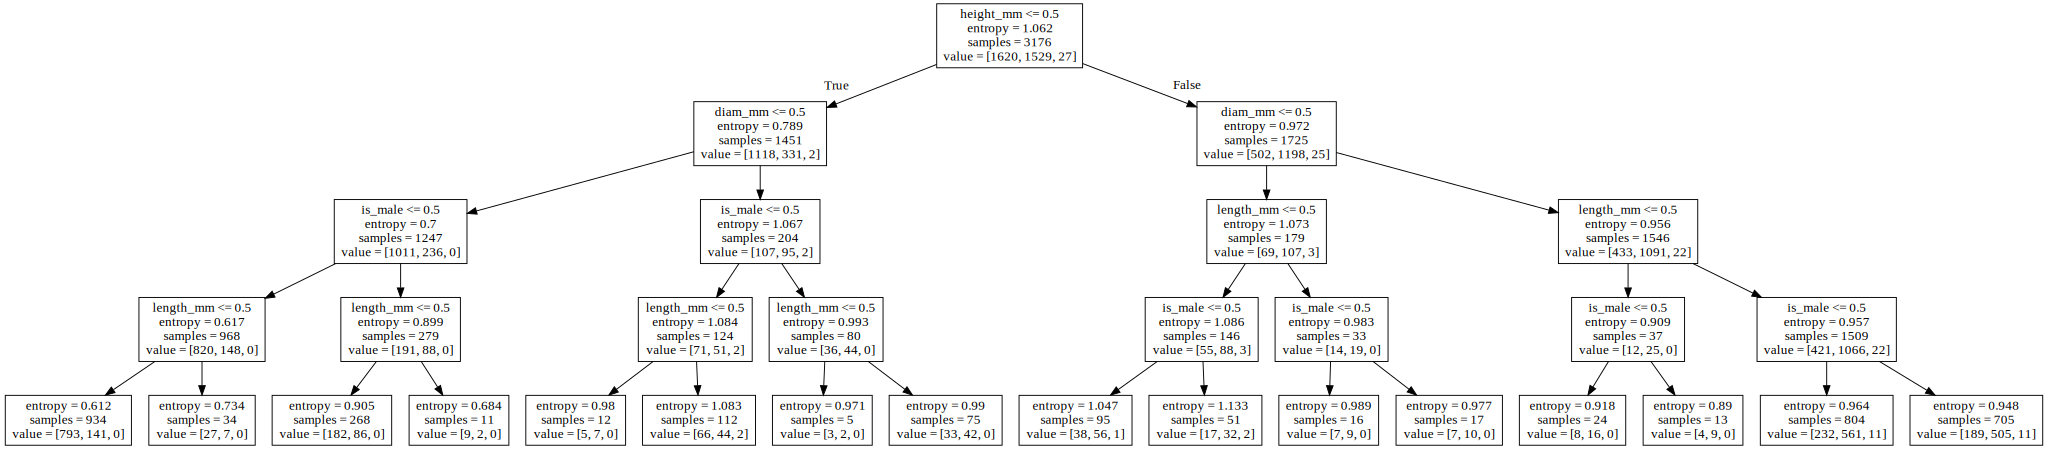

In [15]:
sDTM = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy').fit(sTr_x, sTr_y)

print ("Training Data Accuracy (small): %.4f"% sDTM.score(sTr_x,sTr_y))
print ("Testing Data Accuracy (small): %.4f"% sDTM.score(sTe_x,sTe_y)) 
print("Tree : ALL DATA")

dot_data = sklearn.tree.export_graphviz(sDTM, out_file = None, feature_names = sHeaders)
graph = graphviz.Source(dot_data)
graph.render("small data")
graph

In [16]:
allDTM = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy').fit(allTr_x,allTr_y)

print ("Training Data Accuracy (all): %.4f"% allDTM.score(allTr_x,allTr_y))
print ("Testing Data Accuracy (all): %.4f"% allDTM.score(allTe_x,allTe_y))

dot_data1 = sklearn.tree.export_graphviz(allDTM, out_file = None, feature_names = allHeaders)
graph1 = graphviz.Source(dot_data1)
graph1.render("all data")
graph1

Training Data Accuracy (all): 1.0000
Testing Data Accuracy (all): 0.1960


#### (b) Discuss the results seen for the two trees
The first decision tree has 4 features with simplified binary numbers, whereas the second decision tree is much bigger and has 8 features with float numbers. Based on the accuracy results, the second tree yield a better accuracy on the training data, which implies that giving more features and data will allow a higher classifier performance of the training data. The testing accuracy of the first tree is similar and within the same range as the training accuracy; However, the testing accuracy of the second tree is much lower than the training accuracy, implying that overfitting occur, such that the tree is not a good classifier on new unknown data.

Overall, the first tree performed better than the second on testing data and this is because the second classifier was given too much information/features/data such that the tree created is huge, consisting of a large depth and number of branches & leaves, thus overfitting the training data and poor performance on testing data.